# Lead Scoring Case Study

In [111]:
## Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## importing sklearn and statsmodel libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



## Model evaluation

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

##Supressing Warnings

import warnings
warnings.filterwarnings('ignore')
plt.style.use("ggplot")

# Importing the data

In [53]:
lead_df = pd.read_csv(r"D:\Vimala\Upgrad\Machine Learning -1\Case Study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
pd.set_option('display.max_columns', None)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Understanding the Data

In [54]:
## Checking the data type of columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [55]:
## Checking the summary of all numerical columns
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [56]:
## Checking the number of values in each column
lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [57]:
## Checking the count of missing value in columns
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#Note: observing the above values, in few columns, there are very high number of null values presented in it

In [58]:
## Checking for duplicate rows
lead_df.duplicated().sum()

0

#There are no duplicates in the dataset.

In [59]:
## Missing Data Percentage

round(lead_df.isnull().sum()/lead_df.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

#based on dataset I observed that following things need to be done
- Encoding categorical variable
- Missing value handling
- convert the select into the NaN
- Dropping columns having more than 70% null values. 

# Data Preparation

In [60]:
## Encoding the variables with yes/no labels

for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
               'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
               'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']:
    lead_df[feature] = lead_df[feature].apply(lambda x : 1 if x=='yes' else 0)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


Converting SELECTs into NaNs

In [61]:
## Listing the categorical variables yet to be encoded

lead_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [62]:
## Checking the labels of the remaining categorical columns

for col in lead_df.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("")
    print(lead_df[col].value_counts(normalize=True))
    print("")

Lead Origin

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

Lead Source

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

Last Activity

Email Opened                    0.376163
SMS Sent                        0.3004

In [63]:
## Converting all the selects NaN as the user didn't select any option from the list and "select" is as good as "NaN"

lead_df = lead_df.replace('Select', np.nan)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Missing Value Handling

In [64]:
## Droping columns having more than 70% null values

lead_df = lead_df.drop(lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0], 2)>0.70)].columns, 1)

In [65]:
# as the lead quality depends upons the intution of the employee, it will be safer to update the NaN to "Not Sure"
lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan, 'Not Sure')

#### Note: There are too many variations in columns and it is not safer to  impute any values in the columns and hence we will drop these columns with very high percentage of missing data

In [66]:
lead_df = lead_df.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score','Asymmetrique Profile Index', 'Asymmetrique Profile Score'],1)


In [67]:
## we can input the MUMBAI into all the NULLS as most of the values belong to MUMBAI
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')

#Since there is no significant difference among top 3 specialisation, hence it will be safer to impute NaN with others
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Other_Specilization')

#For Tags columns, morethan 30% data is for "will revert after reading the email" and hence we can impute NULLS with will revert after reading an email
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'will revert after reading the email')

# more than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# more than 85% data is of 'unemployed' and hence it is safer to impute NULLS with this value
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

# more than 95% of data is of "India" and hence it is safer to impute NULLS with this value
lead_df['Country'] = lead_df['Country'].replace(np.nan, 'India')

In [68]:
## Checking missing data percentage in the upload dataframe
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [69]:
## Remaining null values are less than 2% and hence those rows can be directly dropped

lead_df.dropna(inplace=True)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other_Specilization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other_Specilization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other_Specilization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


# Exploratory Data Analysis

In [70]:
## Checking the target variable and see if we have any data imbalance or not
lead_df["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

we have a good classes of data, so we can for further analysis

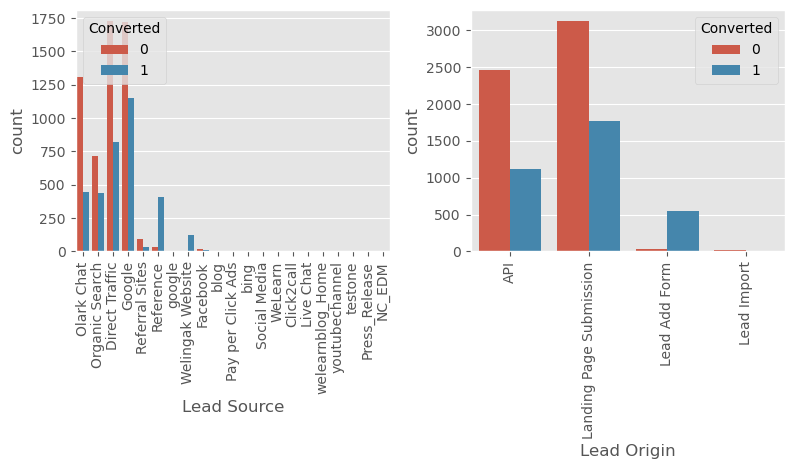

In [71]:
fig=plt.subplots(figsize=(12,12))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(lead_df[feature], hue=lead_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Observation:
- API and landing page submission has less conversion rate (-30%) but counts of the leads from them are considerable.
- The count of Leads from the Lead add from is pretty low but the conversion rate is high
- Lead import has very less count as well as conversion rate and hence can be ignored. 

In [72]:
## For better visualization and analysis

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                                                        'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home',
                                                        'youtubechannel'], 'Other_Lead_Source')
lead_df['Lead Source'] = lead_df['Lead Source'].replace("google", 'Google')

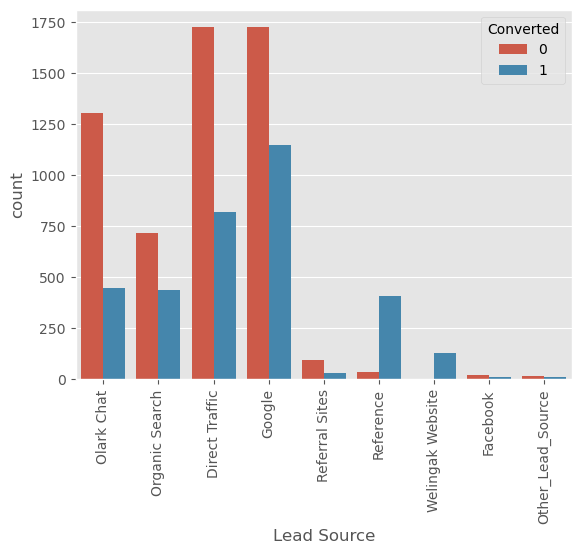

In [73]:
## Plotting Lead Source again

sns.countplot(x="Lead Source", hue="Converted", data= lead_df)
plt.xticks(rotation = 'vertical')
plt.show()

#### Observation:
- The count of leads from the Google and Direct Traffic is maximum
- The conversion rate of the leads from reference and welingak website is maximum

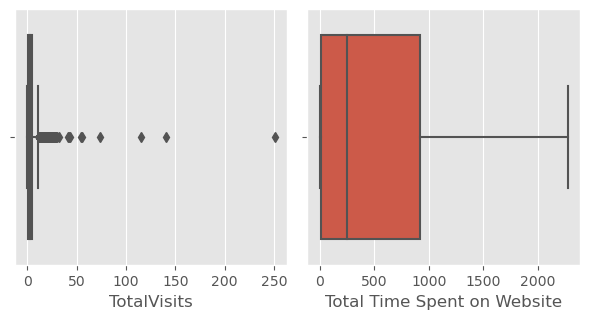

In [74]:
fig=plt.subplots(figsize=(6,6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(lead_df[feature])
    plt.tight_layout()

In [75]:
## There are lot of outliers in the Total visits columns and we can cap this variable to 95%

q1= lead_df["TotalVisits"].quantile(0.95)
lead_df["TotalVisits"][lead_df["TotalVisits"]>=q1] = q1

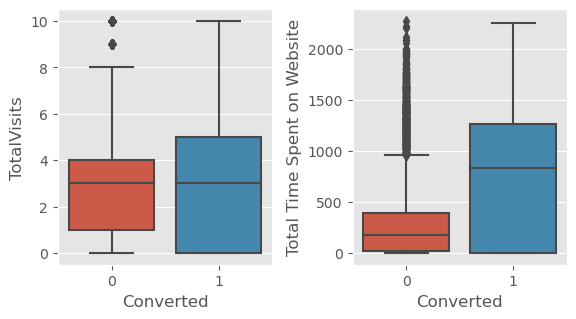

In [76]:
fig=plt.subplots(figsize=(6,6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y=feature, x = 'Converted', data = lead_df)
    plt.tight_layout() 

#### Observation:
- The median of both the conversion and non-conversion are same and hence nothing conclusive can be said using this information. 
- Users spending more time on the website are more likely to get converted.

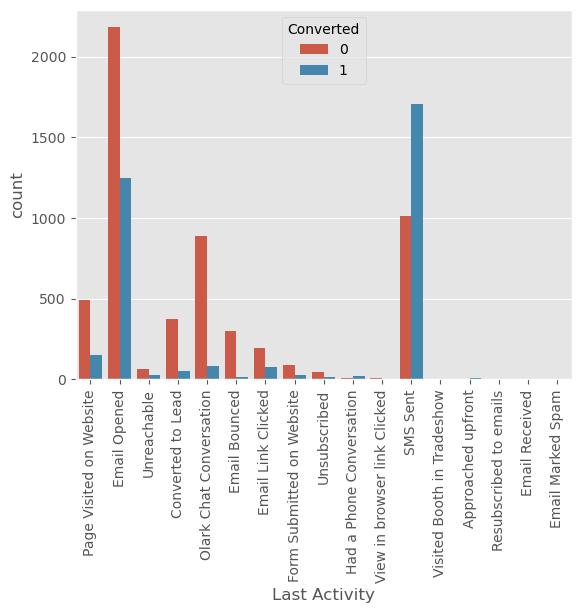

In [77]:
## Plotting the last activity again
sns.countplot (x="Last Activity", hue="Converted", data = lead_df)
plt.xticks(rotation='vertical')
plt.show()

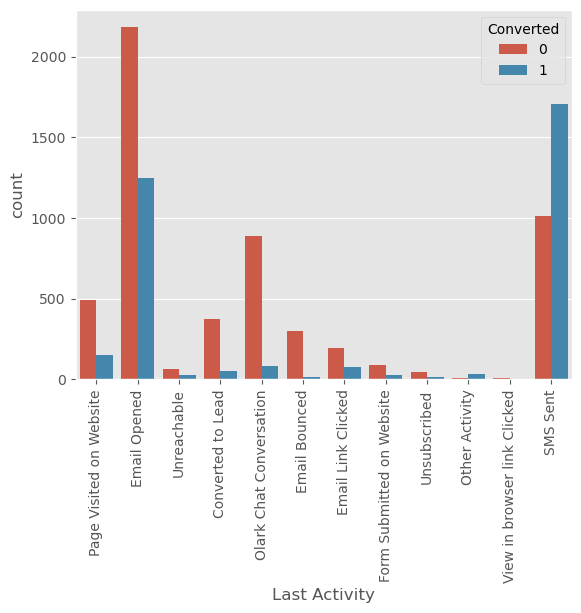

In [78]:
## Converting all the low count categories to the 'others' category

lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link clicked', 'Visited Booth in Tradeshow', 
                                                            'Approached upfront', 'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Other Activity')
##plotting the last activity again
sns.countplot(x="Last Activity", hue="Converted", data = lead_df)
plt.xticks(rotation = 'vertical')
plt.show()

#### Observation
- the count of last activity as "Email Opened" is maximum
- the conversion rate of SMS sent as last activity is maximum

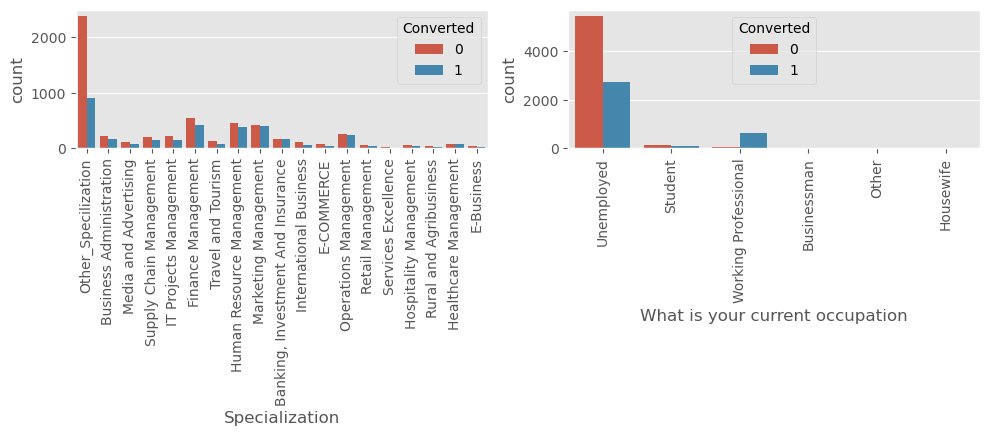

In [79]:
fig =plt.subplots(figsize=(10,6))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue = 'Converted', data = lead_df)
    plt.xticks(rotation = 'vertical')
    plt.tight_layout() 

#### Observation
- Looking at above plot, no particular inference can be made for specilization
- Looking at above plot, we can say that working professionals have high conversion rate
- Number of unemployed leads are more than any category

#### To increase the overall conversion rate, we need to increase the number of working professionals leads by reaching out to them through different social sites such as linkedin etc. and also on increasing the conversion rate of unemployed leads
- country what matters most what we choose in course, city columns have most values corresponding to one value such as India for country, mumbai for city and hence there is no particular insights for these columns. 

In [80]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace('Other', 'Other_Occupation')

In [81]:
lead_df[["Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", 
        "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"]].describe()


,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.0,9074.0,9074.0,9074.0,9074.0,9074.0,9074.0,9074.0,9074.0,9074.0,9074.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Observation:
- By observing that, the most values in all the columns are 0, i.e,. "No" and hence no inference can be made using these columns

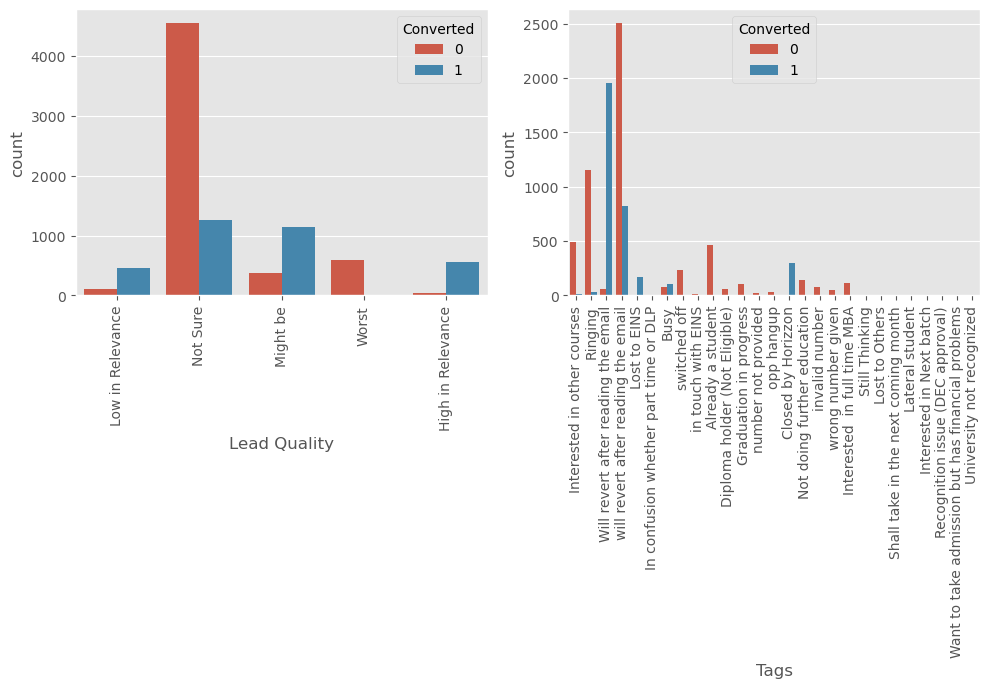

In [82]:
fig =plt.subplots(figsize=(10,10))

for i, feature in enumerate(["Lead Quality", "Tags"]):
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue = 'Converted', data = lead_df)
    plt.xticks(rotation = 'vertical')
    plt.tight_layout() 

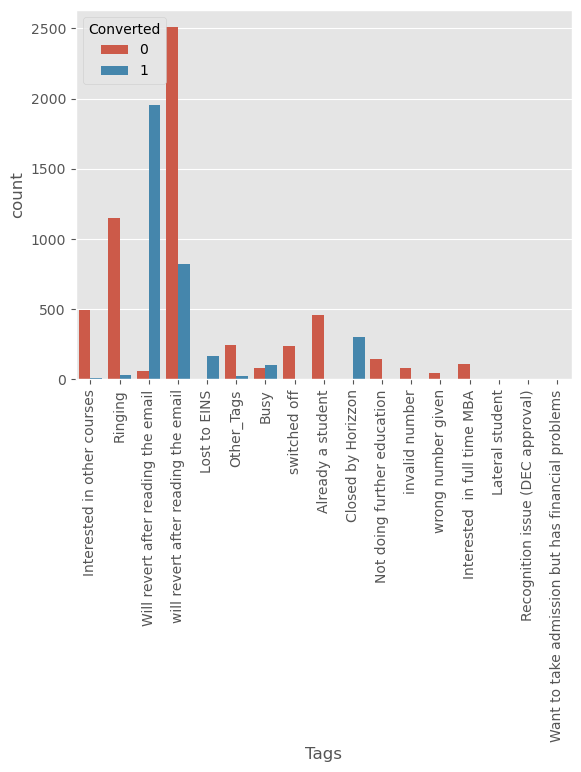

In [83]:
## Converting all the low count categories to the 'others' category

lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS', 'Diploma holder (Not Eligible)', 
                                          'Approached upfront', 'Graduation in progress', 'number not provided', 'opp hangup', 'Still Thinking',
                                          'Lost to Others', 'Shall take in the next coming month', 'Lateral Student', 'Interested in Next batch',
                                          'University not recognized'], 'Other_Tags')
##  plotting the Tags again
sns.countplot(x="Tags", hue="Converted", data = lead_df)
plt.xticks(rotation = 'vertical')
plt.show()

#### Observation:
- Will revert after reading the email and closed by horizon have high conversion rate. 

### Summary:
- To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'
- To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organc Search', 'Direct Traffic', and also increasing the number of leads from 'Reference' and 'Welingak Website'.
- websites can be made more appealing as to increase the time of the users on websites.
- we need to focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent. 
- to increase overall conversion rate, we need to increase the number of working professional leads by reaching out to them through different social sites such as Linkedin etc. and also increasing the conversion rate of unemployed leads.
- by observing till now, there are multiple columns data of single value only. as these columns do not contribute towards any intereference. we can remove them from further analysis

In [84]:
## Dropping unnecessary columns

lead_df = lead_df.drop(["Lead Number", "What matters most to you in choosing a course", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", 
        "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "A free copy of Mastering The Interview",
                       "Country", "Do Not Call"],1)

lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specilization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specilization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specilization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


# Dummy Variable Creation

In [85]:
dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 
                               'Tags', 'Lead Quality', 'City', 'Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specilization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_will revert after reading the email,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [86]:
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 
                       'Tags', 'Lead Quality', 'City', 'Last Notable Activity'], axis = 1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0


In [87]:
lead_df = pd.concat([lead_df, dummy], axis=1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specilization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_will revert after reading the email,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Test - Train Split

In [88]:
# puttig feature variable to x

x = lead_df.drop(['Prospect ID', 'Converted'], axis = 1)

# putting response variable to y

y = lead_df['Converted']
print(y)
x.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specilization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_will revert after reading the email,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [115]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [116]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                               'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specilization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_will revert after reading the email,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,0,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [117]:
## Checking the conversion rate
print("Conversion rate is", (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Conversion rate is 37.85541106458012


## Looking at correlations

In [118]:
# Correlation between different numerical variables for both the converted and not-converted cases

conv_corr = lead_df.corr()

# Unstacking the correlation matrix to find out top correlations

conv_corr_unstacked = conv_corr.unstack().sort_values(kind = "quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)


Lead Origin_Lead Import                Lead Source_Facebook                              0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed                0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                             0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened                0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                    0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked          0.800686
TotalVisits                            Page Views Per Visit                              0.737996
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website     0.691811
Converted                              Tags_Will revert after reading the email          0.652518
Last Activity_Other Activity           Last Notable Activity_Had a Phone Conversation    0.622852
dtype: float64

In [119]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Facebook', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_SMS Sent',
                     'Last Notable Activity_Email Opened', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website'], 1)

X_train = X_train.drop(['Lead Source_Facebook', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_SMS Sent',
                     'Last Notable Activity_Email Opened', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website'], 1)

In [120]:
conv_corr = X_train.corr()

In [121]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending = False).head(10)

Lead Origin_Lead Add Form                 Lead Source_Reference                             0.859537
TotalVisits                               Page Views Per Visit                              0.756104
Last Activity_Other Activity              Last Notable Activity_Had a Phone Conversation    0.653827
Tags_will revert after reading the email  Lead Quality_Not Sure                             0.563865
Tags_Will revert after reading the email  Lead Quality_Might be                             0.539895
Lead Source_Olark Chat                    Specialization_Other_Specilization                0.505771
Page Views Per Visit                      Lead Origin_Landing Page Submission               0.493007
Lead Origin_Lead Add Form                 Lead Source_Welingak Website                      0.468225
Last Activity_Email Bounced               Last Notable Activity_Email Bounced               0.450911
TotalVisits                               Lead Origin_Landing Page Submission              

# Model Building

In [122]:
## Logistic Regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                           81
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Jun 2023   Deviance:                       55723.
Time:                        04:23:44   Pearson chi2:                 2.72e+18
No. Iterations:                    78   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   4.779e+13   2.91e+07   1.64e+06      0.000    4.78e+13    4.78e+13
Do Not Email                                              -0.9846   1.88e-07  -5.25e+06      0.000      -0.985      -0.985
TotalVisits                                             7.111e+13   1.44e+06   4.94e+07      0.000    7.11e+13    7.11e+13
Total Time Spent on Website                             3.937e+14   1.03e+06   3.82e+08      0.000    3.94e+14    3.94e+14
Page Views Per Visit                                   -3.344e+13   1.42e+06  -2.35e+07      0.000   -3.34e+13   -3.34e+13
Lead Origin_Landing Page Submission                    -3.843e+14   3.37e+06  -1.14e+08      0.000   -3.84e+14   -3.84e+14
Lead Origin_Lead Add Form                               3.751e+14    2.9e+07   1.29e+07      0.000    3.75e+14    3.75e+14
Lead Origin_Lead Import                                 4.023e+12   1.43e+07   2.82e+05      0.000    4.02e+12    4.02e+12
Lead Source_Google                                      1.848e+14   2.44e+06   7.57e+07      0.000    1.85e+14    1.85e+14
Lead Source_Olark Chat                                 -1.075e+14   3.88e+06  -2.77e+07      0.000   -1.07e+14   -1.07e+14
Lead Source_Organic Search                              6.157e+13   3.21e+06   1.92e+07      0.000    6.16e+13    6.16e+13
Lead Source_Other_Lead_Source                          -2.521e+13   1.85e+07  -1.36e+06      0.000   -2.52e+13   -2.52e+13
Lead Source_Reference                                  -1.446e+14   2.93e+07  -4.94e+06      0.000   -1.45e+14   -1.45e+14
Lead Source_Referral Sites                             -3.137e+13   7.85e+06     -4e+06      0.000   -3.14e+13   -3.14e+13
Lead Source_Welingak Website                            1.063e+15   2.98e+07   3.56e+07      0.000    1.06e+15    1.06e+15
Last Activity_Email Bounced                            -2.615e+14   6.59e+06  -3.97e+07      0.000   -2.61e+14   -2.61e+14
Last Activity_Email Link Clicked                       -7.674e+13   6.74e+06  -1.14e+07      0.000   -7.67e+13   -7.67e+13
Last Activity_Email Opened                             -2.608e+14   4.79e+06  -5.44e+07      0.000   -2.61e+14   -2.61e+14
Last Activity_Form Submitted on Website                 5.561e+13   8.91e+06   6.24e+06      0.000    5.56e+13    5.56e+13
Last Activity_Olark Chat Conversation                   6.298e+14   5.28e+06   1.19e+08      0.000     6.3e+14     6.3e+14
Last Activity_Other Activity                            1.006e+15      2e+07   5.02e+07      0.000    1.01e+15    1.01e+15
Last Activity_Page Visited on Website                  -3.126e+14   5.48e+06  -5.71e+07      0.000   -3.13e+14   -3.13e+14
Last Act

# Feature selection using RFE

In [123]:
# Starting with 15 features selected by RFE
# we will them optimize the model further by inspecting VIF and P-value of the features

logreg = LogisticRegression()

In [125]:
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [126]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 68),
 ('TotalVisits', False, 49),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 50),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 66),
 ('Lead Source_Other_Lead_Source', False, 23),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 55),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 21),
 ('Last Activity_Email Opened', False, 56),
 ('Last Activity_Form Submitted on Website', False, 42),
 ('Last Activity_Olark Chat Conversation', False, 22),
 ('Last Activity_Other Activity', False, 17),
 ('Last Activity_Page Visited on Website', False, 30),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 20),

In [127]:
col = X_train.columns[rfe.support_]

### Assessing the model with Stats model

In [128]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res =logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1361.5
Date:                Sun, 18 Jun 2023   Deviance:                       2722.9
Time:                        04:28:13   Pearson chi2:                 1.03e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5952
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6204      0.192    -13.658      0.000      -2.996      -2.244
Lead Origin_Lead Add Form                         0.3580      0.442      0.810      0.418      -0.509       1.225
Lead Source_Welingak Website                      3.9927      0.863      4.628      0.000       2.302       5.684
Last Activity_SMS Sent                            2.1072      0.110     19.149      0.000       1.892       2.323
Tags_Busy                                         1.8086      0.289      6.267      0.000       1.243       2.374
Tags_Closed by Horizzon                           8.4519      0.752     11.237      0.000       6.978       9.926
Tags_Lost to EINS                                 8.2064      0.787     10.427      0.000       6.664       9.749
Tags_Ringing                                     -2.2352      0.303     -7.389      0.000      -2.828      -1.642
Tags_Will revert after reading the email          6.2992      0.262     24.065      0.000       5.786       6.812
Tags_invalid number                             -22.5888   1.51e+04     -0.001      0.999   -2.97e+04    2.96e+04
Tags_switched off                                -2.3219      0.550     -4.218      0.000      -3.401      -1.243
Tags_will revert after reading the email          1.3489      0.196      6.893      0.000       0.965       1.732
Tags_wrong number given                         -22.6254   2.06e+04     -0.001      0.999   -4.04e+04    4.03e+04
Lead Quality_Worst                               -2.1290      0.694     -3.068      0.002      -3.489      -0.769
Last Notable Activity_Modified                   -1.9031      0.123    -15.429      0.000      -2.145      -1.661
Last Notable Activity_Olark Chat Conversation    -1.1189      0.380     -2.942      0.003      -1.864      -0.374
=================================================================================================================
"""

In [129]:
## Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.218999
1012    0.218999
9226    0.009456
4750    0.697558
7987    0.996951
1281    0.996939
2880    0.218999
4971    0.785055
7536    0.975368
1248    0.009456
dtype: float64

In [130]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21899896, 0.21899896, 0.00945632, 0.69755802, 0.99695134,
       0.99693908, 0.21899896, 0.78505509, 0.97536797, 0.00945632])

### Creating a dataframe with the true conversion status and the predicted probabilities

In [132]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.218999,3009
1,0,0.218999,1012
2,0,0.009456,9226
3,1,0.697558,4750
4,1,0.996951,7987


In [134]:
## Creating new column 'predicted' with 1 if convert_prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x>0.5 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.218999,3009,0
1,0,0.218999,1012,0
2,0,0.009456,9226,0
3,1,0.697558,4750,1
4,1,0.996951,7987,1


In [135]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9256809951188789


### Checking VIFs

In [136]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)
    
calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
1                    Lead Source_Welingak Website                       1.37
4                         Tags_Closed by Horizzon                       1.17
3                                       Tags_Busy                       1.05
14  Last Notable Activity_Olark Chat Conversation                       1.05
5                               Tags_Lost to EINS                       1.04
9                               Tags_switched off                       1.04
8                             Tags_invalid number                       1.01
11                        Tags_wrong number given                       1.01
0                       Lead Origin_Lead Add Form                       0.67
12                             Lead Quality_Worst                       0.40
7        Tags_Will revert after reading the email                       0.16
13                 Last Notable Activity_Modified                       0.16

- All varibles have a good vif value, but I observed earlier that the column "tags invalid number" has high p-value and hence we will drop this column and remake the model.

In [137]:
col = col.drop('Tags_invalid number')
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_will revert after reading the email', 'Tags_wrong number given',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [139]:
## re-run the model using the selected variables

X_train_Sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1361.5
Date:                Sun, 18 Jun 2023   Deviance:                       2722.9
Time:                        04:52:49   Pearson chi2:                 1.03e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5952
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6204      0.192    -13.658      0.000      -2.996      -2.244
Lead Origin_Lead Add Form                         0.3580      0.442      0.810      0.418      -0.509       1.225
Lead Source_Welingak Website                      3.9927      0.863      4.628      0.000       2.302       5.684
Last Activity_SMS Sent                            2.1072      0.110     19.149      0.000       1.892       2.323
Tags_Busy                                         1.8086      0.289      6.267      0.000       1.243       2.374
Tags_Closed by Horizzon                           8.4519      0.752     11.237      0.000       6.978       9.926
Tags_Lost to EINS                                 8.2064      0.787     10.427      0.000       6.664       9.749
Tags_Ringing                                     -2.2352      0.303     -7.389      0.000      -2.828      -1.642
Tags_Will revert after reading the email          6.2992      0.262     24.065      0.000       5.786       6.812
Tags_invalid number                             -22.5888   1.51e+04     -0.001      0.999   -2.97e+04    2.96e+04
Tags_switched off                                -2.3219      0.550     -4.218      0.000      -3.401      -1.243
Tags_will revert after reading the email          1.3489      0.196      6.893      0.000       0.965       1.732
Tags_wrong number given                         -22.6254   2.06e+04     -0.001      0.999   -4.04e+04    4.03e+04
Lead Quality_Worst                               -2.1290      0.694     -3.068      0.002      -3.489      -0.769
Last Notable Activity_Modified                   -1.9031      0.123    -15.429      0.000      -2.145      -1.661
Last Notable Activity_Olark Chat Conversation    -1.1189      0.380     -2.942      0.003      -1.864      -0.374
=================================================================================================================
"""

In [140]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

In [142]:
## Creating new column 'predicted' with 1 if Convert prob >0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.218999,3009,0
1,0,0.218999,1012,0
2,0,0.009456,9226,0
3,1,0.697558,4750,1
4,1,0.996951,7987,1


In [143]:
## Checking the overall accuracy
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9256809951188789


- The accuracy is still practically same

#### Checking the VIF again

In [144]:
calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
1                    Lead Source_Welingak Website                       1.37
4                         Tags_Closed by Horizzon                       1.17
3                                       Tags_Busy                       1.05
13  Last Notable Activity_Olark Chat Conversation                       1.05
5                               Tags_Lost to EINS                       1.04
8                               Tags_switched off                       1.04
10                        Tags_wrong number given                       1.01
0                       Lead Origin_Lead Add Form                       0.67
11                             Lead Quality_Worst                       0.40
7        Tags_Will revert after reading the email                       0.16
12                 Last Notable Activity_Modified                       0.15
2                          Last Activity_SMS Sent                       0.14

- All variables have a good value of VIF and p values. so we need not drop any more variables and we can proceed with making predictions using this model only. 

In [148]:
## Evaluate model

def evaluate_model(y_true, y_predicted, print_score = False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    
    TP = confusion[1,1]  # true positive
    TN = confusion[0,0]  # true negatives
    FP = confusion[0,1]  # false positives
    FN = confusion[1,0]  # false negatives
    
    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP/float(TP+FN)
    specificity_score = TP/float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print('Confusion Matrix :\n', confusion)
        print("Accuracy:", accuracy_sc)
        print("Sensitivity:", sensitivity_score)
        print("Specificity:", specificity_score)
        print("Precision :", precision_sc)
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [149]:
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score = True)

Confusion Matrix :
 [[3761  144]
 [ 328 2118]]
Accuracy: 0.9256809951188789
Sensitivity: 0.8659035159443991
Specificity: 0.542381562099872
Precision : 0.9363395225464191


(0.9256809951188789, 0.8659035159443991, 0.542381562099872, 0.9363395225464191)

## Plotting the ROC Curve

#### An ROC Curve 
- shows tradeoff between sensitivity and specificity
- the closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test
- The closer the curve comes to the 45degree diagonal of the ROC space, the reference line, means less area and the less accurate is the test.

In [152]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = "lower right")
    plt.show()
    
    return None

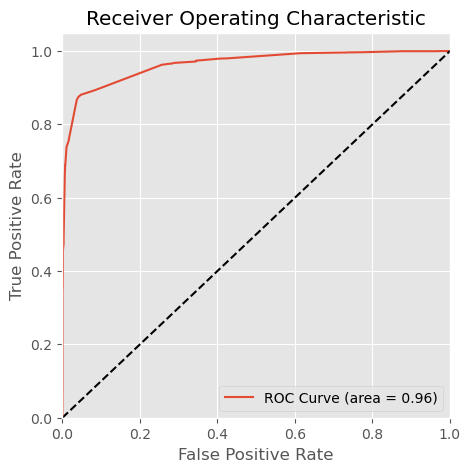

In [153]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False)
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

## Finding optimal value of the cut off

In [155]:
## Predicting converting status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x> i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.218999,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.218999,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.009456,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.697558,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.996951,7987,1,1,1,1,1,1,1,1,1,1,1


In [156]:
df = pd.DataFrame(columns = ['probability_score', 'accuracy_score', 'sensitivity_score', 'specificity_score', 'precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score, sensitivity_score, specificity_score, precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] = [i, accuracy_score, sensitivity_score, specificity_score, precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.385136,1.000000,0.626376,0.385136
0.1,0.1,0.827429,0.962796,0.603073,0.700893
0.2,0.2,0.827586,0.962796,0.603073,0.701102
0.3,0.3,0.924894,0.879804,0.551088,0.921627
0.4,0.4,0.925996,0.866721,0.542894,0.936396
0.5,0.5,0.925681,0.865904,0.542382,0.936340
0.6,0.6,0.925681,0.865904,0.542382,0.936340
0.7,0.7,0.896709,0.757972,0.474776,0.966632
0.8,0.8,0.892615,0.737939,0.462228,0.977790
0.9,0.9,0.875925,0.688880,0.431498,0.984229


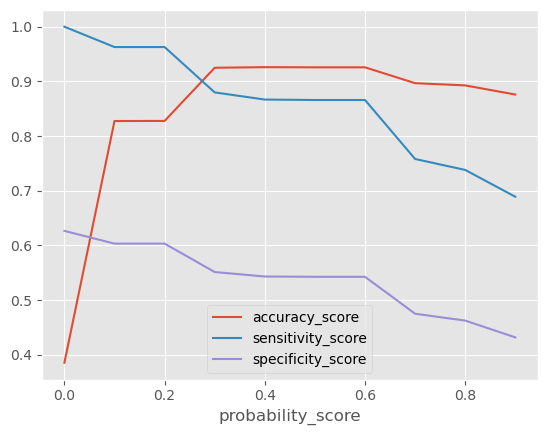

In [157]:
df.plot.line(x='probability_score', y=['accuracy_score', 'sensitivity_score', 'specificity_score'])
plt.show()

## Precision Recall Trade off

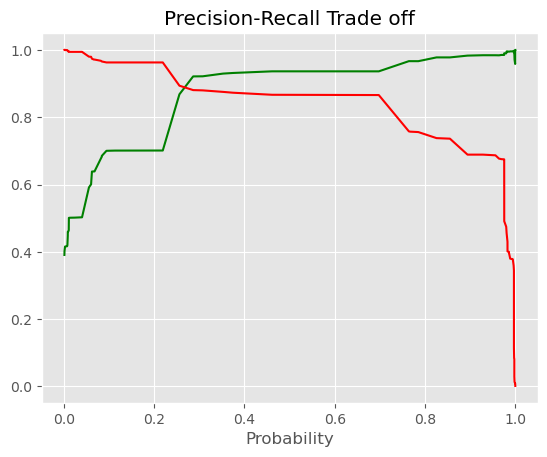

In [159]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

- in sensitivity specificity accuracy plot 0.27 probability looks optimal. in precision-recall curve 0.3 looks optimal
- we are taking 0.27 is the optimum point as a cutoff probability and assigning lead score in training data

In [160]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x>0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.218999,3009,0,22
1,0,0.218999,1012,0,22
2,0,0.009456,9226,0,1
3,1,0.697558,4750,1,70
4,1,0.996951,7987,1,100


In [161]:
# Evaluating model performance on training data
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score = True)

Confusion Matrix :
 [[3721  184]
 [ 292 2154]]
Accuracy: 0.9250511730436152
Sensitivity: 0.8806214227309894
Specificity: 0.5516005121638925
Precision : 0.9213002566295979


(0.9250511730436152,
 0.8806214227309894,
 0.5516005121638925,
 0.9213002566295979)

In [ ]:
## Getting the predicted value on the train set

X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns = ["Converting_probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)], axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_probability.map(lambda x: round(x*100))

y_predicted_final.head()

In [ ]:
## Evaluating model performance on test data

evaluate_model(y_prescribed_final.Converted, y_predicted_final.final_predicted, print_score = True)

# Final Model

In [178]:
def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted': y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("---------------------Result of training data----------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score in Test Data
    
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)
    
    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted': y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace = True, drop=True)
    print("---------------------Result of training data----------------------")
    print(y_test_pred_final.head())
    print("------------------------Model Evaluation Metrics---------------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score = True)
    
    return y_test_pred_final

In [179]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.27)

---------------------Result of training data----------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.220421                  0          22
1         1012          0             0.220421                  0          22
2         9226          0             0.009592                  0           1
3         4750          1             0.691527                  1          69
4         7987          1             0.996832                  1         100
---------------------Result of training data----------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.220421                  0          22
1         1490          1             0.975091                  1          98
2         7936          0             0.220421                  0          22
3         4216          1             0.986910                  1          99
4       

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.220421,0,22
1,1490,1,0.975091,1,98
2,7936,0,0.220421,0,22
3,4216,1,0.986910,1,99
4,3830,0,0.220421,0,22
...,...,...,...,...,...
2718,850,0,0.041369,0,4
2719,2879,0,0.008932,0,1
2720,6501,1,0.996788,1,100
2721,7155,0,0.041369,0,4


In [184]:
print("Features used in Final Model :", col)

print("-----------------------------Feature Importance------------------------")
print(res.params)

Features used in Final Model : Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_will revert after reading the email', 'Tags_wrong number given',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
-----------------------------Feature Importance------------------------
const                                            -2.620423
Lead Origin_Lead Add Form                         0.357959
Lead Source_Welingak Website                      3.992723
Last Activity_SMS Sent                            2.107206
Tags_Busy                                         1.808589
Tags_Closed by Horizzon                           8.451879
Tags_Lost to EINS                                 8.206354
Tags_Ri

## Conclusion:
- The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. then a cutoff the probability is used to obtain the predicted value of the target variable. 
- here, the logistic regression model is used to predict the probability of conversion of a customer. 
- optimum cutoff is choosen to be 0.27 i.e, any lead with greater than 0.27 probability of converting is predicted as Hot Lead and any lead with 0.27 or less probability of converting is predicted as cold lead
- Final logistic regression model is built with 14 features
- The top three categorical/dumm variables in the final model are 'Tags_Lost to EINS', 'Tags_Closed by Horizon', 'Lead Quality_Worst' with respect to the absolute value of their coeffecient factors. 

Tags_Lost to EINS', 'Tags_Closed by Horizon are obtained by encoding original categorical variable 'Tags', 'Lead Qulaity worst', is obtained by encoding the categorical variable lead quality

- Tags lost to EINS (coeffeicient factor = 9.578632)
- Tags closed by horizzon (coeffecient factor = 8.555901)
- Lead Quality worst (coeffecient factor = 3.943680)

- the final model has sensitivity of 0.928, this means the model is able to predict 92% customers out of all the converted customers, (positive conversion) correctly
- the final model has precision of 0.68, this means 68% of predicted hot leads are true hot leads.
- we have also built an reusable code block which will predict convert value and lead score given training. test data and a cut off different cut offs can be used depending on the use cases (for eg when high sensitivity is required, when model have optimum precision score etc. 